# WEEK 1: Math Behind the Linear Regression with Visualizing Contour Plots

Linear regression is a fundamental statistical method used for modeling the relationship between a dependent variable (target) and one or more independent variables (features). Here's a breakdown of the mathematical concepts and how contour plots help us visualize the cost function involved in the regression.


* 1. Linear Regression Model

In linear regression, we aim to fit a straight line to a set of data points. The equation of the line is:

$$
y = w_0 + w_1 x
$$ 

Where:  
$y$ : predicted value (dependent variable).  
$x$ : feature (independent variable).  
$w_0$ : intercept (bias term).  
$w_1$ : slope (weight of the feature).  

---

* 2. Hypothesis Function

The predicted output is denoted as $h_w(x)$, where $w = [w_0, w_1]$ represents the model parameters. The hypothesis function for linear regression is:

$$
h_w(x) = w_0 + w_1 x
$$

This equation predicts the value of $y$ for a given input $x$.

---

* 3. Cost Function (Mean Squared Error)

To assess how well our model fits the data, we use a cost function to measure the error. The cost function quantifies the difference between the predicted values $\hat{y}$ and the true values $y$.

The Mean Squared Error (MSE) cost function is:

$$
J(w_0, w_1) = \frac{1}{n} \sum_{i=1}^{n} \left( h_w(x^{(i)}) - y^{(i)} \right)^2
$$

Where:  
$J(w_0, w_1)$ : cost function to minimize.  
$n$ : number of data points.  
$x^{(i)}$ and $y^{(i)}$ : $i$-th data point’s feature and target value.  
$h_w(x^{(i)}) = w_0 + w_1 x^{(i)}$ : predicted value for the $i$-th data point.

The goal is to minimize $J(w_0, w_1)$ by adjusting $w_0$ and $w_1$ so that predictions are as close to the true values as possible.

---

* 4. Gradient Descent or Closed-Form Solution

To find the optimal $w_0$ and $w_1$ that minimize the cost function, we can use two approaches:
1. **Gradient Descent**: Iterative optimization.
2. **Closed-Form Solution**: Analytical solution.

**Closed-Form Solution**:

The closed-form solution directly computes the optimal parameters using matrix notation:

$$
w = (X^T X)^{-1} X^T y
$$

Where:  
$x$ : matrix of input features (with an additional column of 1s for \( w_0 \)).  
$y$ : vector of true output values.  
$X^T$ : transpose of \( X \).

This method minimizes the cost function analytically.

**Gradient Descent**:

Gradient Descent is an iterative optimization algorithm that updates $w_0$ and $w_1$ to minimize the cost function.

The update rules are:

$$
w_0 := w_0 - \alpha \frac{\partial J(w_0, w_1)}{\partial w_0}
$$

$$
w_1 := w_1 - \alpha \frac{\partial J(w_0, w_1)}{\partial w_1}
$$

Where:  
$\alpha$ : learning rate (step size).  
$\frac{\partial J(w_0, w_1)}{\partial w_0}$: partial derivative w.r.t $w_0$.  
$\frac{\partial J(w_0, w_1)}{\partial w_1}$: partial derivative w.r.t $w_1$.

The partial derivatives are:

$$
\frac{\partial J(w_0, w_1)}{\partial w_0} = \frac{2}{n} \sum_{i=1}^{n} \left( h_w(x^{(i)}) - y^{(i)} \right)
$$

$$
\frac{\partial J(w_0, w_1)}{\partial w_1} = \frac{2}{n} \sum_{i=1}^{n} \left( h_w(x^{(i)}) - y^{(i)} \right) x^{(i)}
$$


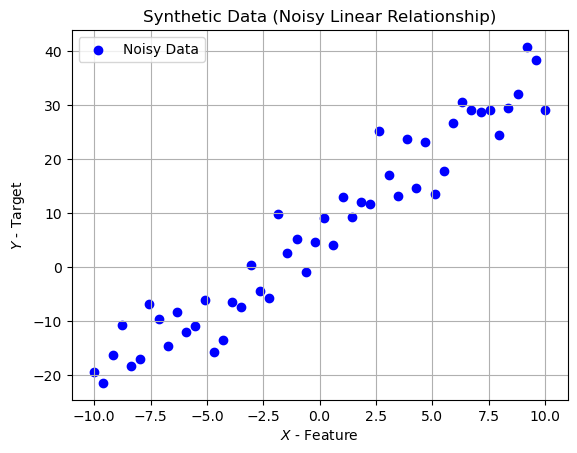

Closed-form solution parameters:
Intercept (w0): 6.87
Slope (w1): 2.86
Gradient Descent parameters:
Intercept (w0): 6.87
Slope (w1): 2.86


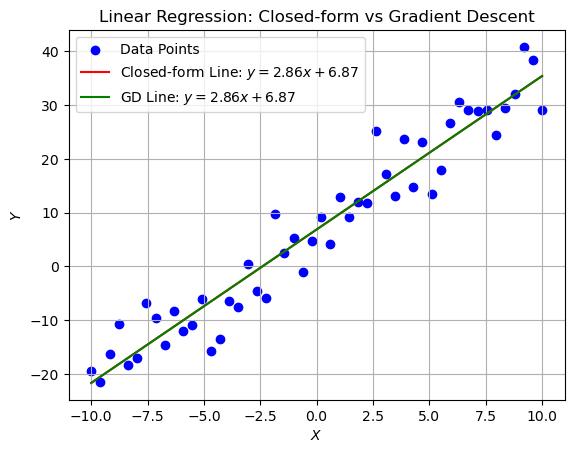

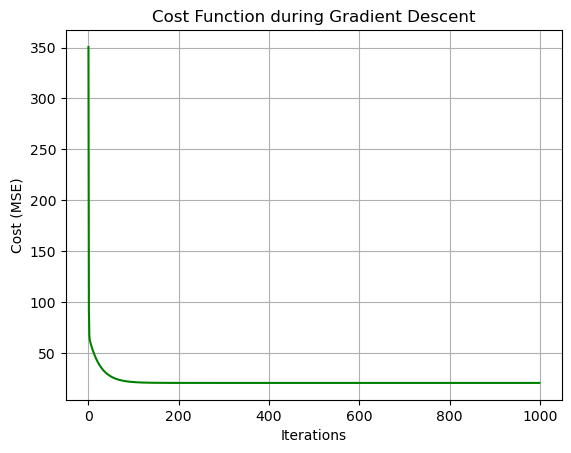

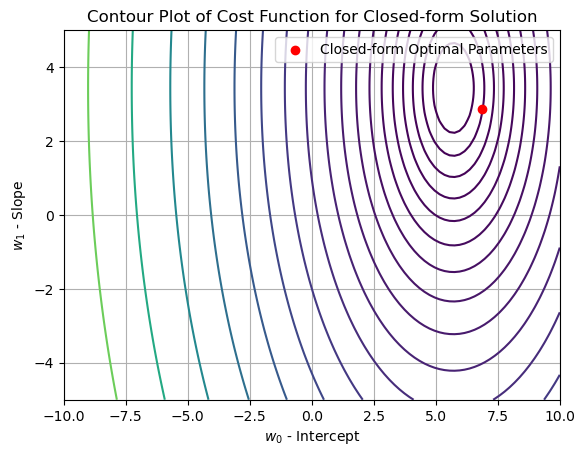

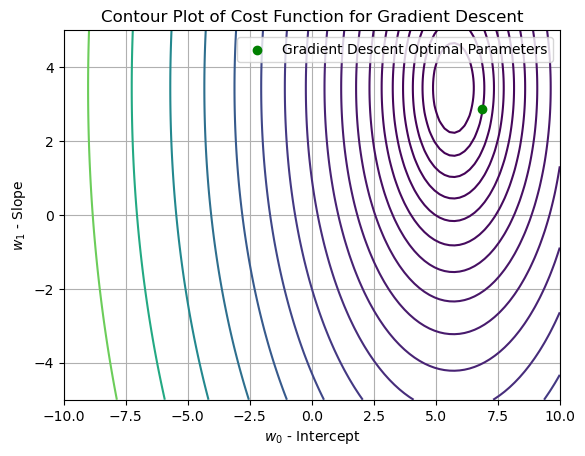

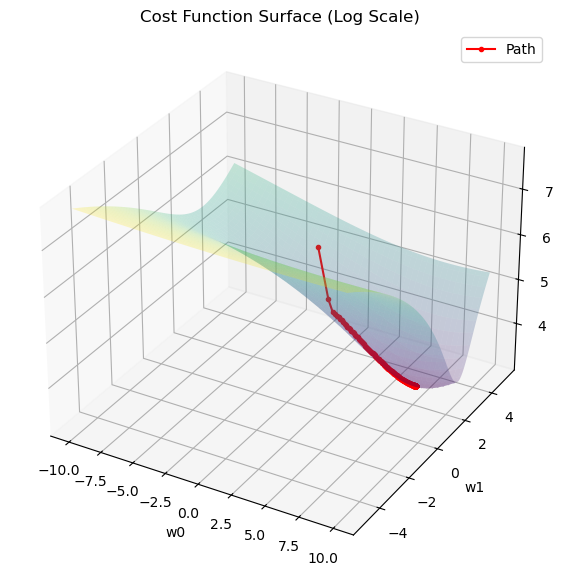

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic data for demonstration
def create_data_points(n=50, noise_level=5.0):
    np.random.seed(42)
    X = np.linspace(-10, 10, n)
    true_slope = 3  # True slope (weight)
    true_intercept = 8  # True intercept (bias)
    
    noise = np.random.randn(n) * noise_level
    y = true_slope * X + true_intercept + noise
    return X, y

X, y = create_data_points(n=50, noise_level=5.0)

# Visualize the noisy data points
plt.scatter(X, y, color='blue', label='Noisy Data')
plt.title("Synthetic Data (Noisy Linear Relationship)")
plt.xlabel("$X$ - Feature")
plt.ylabel("$Y$ - Target")
plt.legend()
plt.grid(True)
plt.show()

# Model: h(x) = w0 + w1 * X
def linear_model(X, w):
    return w[0] + w[1] * X

# Closed-form Solution for Linear Regression
def linear_regression(X, y):
    X_b = np.c_[np.ones((len(X), 1)), X]  # Add bias term (X_0 = 1)
    # The closed-form solution: w = (X^T * X)^-1 * X^T * y
    weights = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return weights

# Gradient Descent for Linear Regression
def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m = len(X)
    w = np.zeros(2)  # Initial weights: [w0, w1]
    cost_history = []
    w_history = []  # To track weight updates

    # Add bias term to X
    X_b = np.c_[np.ones((m, 1)), X]

    for _ in range(iterations):
        # Compute the model's predictions
        y_pred = X_b.dot(w)
        
        # Compute the gradient (partial derivatives of the cost function)
        gradients = (2/m) * X_b.T.dot(y_pred - y)
        
        # Update the weights
        w -= learning_rate * gradients
        
        # Compute and store the cost (Mean Squared Error)
        cost = np.mean((y_pred - y) ** 2)
        cost_history.append(cost)
        
        # Store weights history for visualization
        w_history.append(w.copy())
    
    return w, cost_history, w_history  # Return w_history for visualization

# Perform Closed-form Linear Regression
weights_closed_form = linear_regression(X, y)

# Perform Gradient Descent
w_optimal, cost_history, w_history = gradient_descent(X, y, learning_rate=0.01, iterations=1000)

# Extract parameters for both methods
w0_closed_form, w1_closed_form = weights_closed_form[0], weights_closed_form[1]
w0_optimal, w1_optimal = w_optimal[0], w_optimal[1]

# Print the learned parameters
print(f"Closed-form solution parameters:")
print(f"Intercept (w0): {w0_closed_form:.2f}")
print(f"Slope (w1): {w1_closed_form:.2f}")

print(f"Gradient Descent parameters:")
print(f"Intercept (w0): {w0_optimal:.2f}")
print(f"Slope (w1): {w1_optimal:.2f}")

# Make predictions using the learned models
y_pred_closed_form = linear_model(X, weights_closed_form)
y_pred_optimal = linear_model(X, w_optimal)

# Visualize the data with the fitted regression lines
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred_closed_form, color='red', label=f"Closed-form Line: $y = {w1_closed_form:.2f}x + {w0_closed_form:.2f}$")
plt.plot(X, y_pred_optimal, color='green', label=f"GD Line: $y = {w1_optimal:.2f}x + {w0_optimal:.2f}$")
plt.title("Linear Regression: Closed-form vs Gradient Descent")
plt.xlabel("$X$")
plt.ylabel("$Y$")
plt.legend()
plt.grid(True)
plt.show()

# Plot the cost function over iterations (for Gradient Descent)
plt.plot(cost_history, color='green')
plt.title("Cost Function during Gradient Descent")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.grid(True)
plt.show()

# Contour Plot: Visualizing the Cost Function (Squared Error) with respect to w0 and w1 for both methods

def compute_cost(X, y, w0, w1):
    # Predicted values based on parameters w0 and w1
    y_pred = linear_model(X, [w0, w1])
    # Mean squared error cost function
    cost = np.mean((y_pred - y) ** 2)
    return cost

# Create a grid of w0 and w1 values
w0_vals = np.linspace(-10, 10, 100)
w1_vals = np.linspace(-5, 5, 100)

# Initialize the cost matrix
cost_vals_closed_form = np.zeros((len(w0_vals), len(w1_vals)))
cost_vals_gd = np.zeros((len(w0_vals), len(w1_vals)))

# Calculate the cost for each combination of w0 and w1 for both methods
for i, w0 in enumerate(w0_vals):
    for j, w1 in enumerate(w1_vals):
        cost_vals_closed_form[i, j] = compute_cost(X, y, w0, w1)
        cost_vals_gd[i, j] = compute_cost(X, y, w0, w1)

# Create the contour plot for Closed-form Solution
W0, W1 = np.meshgrid(w0_vals, w1_vals)
plt.contour(W0, W1, cost_vals_closed_form, levels=np.logspace(np.log10(cost_vals_closed_form.min()), np.log10(cost_vals_closed_form.max()), 20), cmap='viridis')
plt.scatter(w0_closed_form, w1_closed_form, color='red', label='Closed-form Optimal Parameters', zorder=5)
plt.title("Contour Plot of Cost Function for Closed-form Solution")
plt.xlabel("$w_0$ - Intercept")
plt.ylabel("$w_1$ - Slope")
plt.legend()
plt.grid(True)
plt.show()

# Create the contour plot for Gradient Descent Solution
plt.contour(W0, W1, cost_vals_gd, levels=np.logspace(np.log10(cost_vals_gd.min()), np.log10(cost_vals_gd.max()), 20), cmap='viridis')
plt.scatter(w0_optimal, w1_optimal, color='green', label='Gradient Descent Optimal Parameters', zorder=5)
plt.title("Contour Plot of Cost Function for Gradient Descent")
plt.xlabel("$w_0$ - Intercept")
plt.ylabel("$w_1$ - Slope")
plt.legend()
plt.grid(True)
plt.show()

# Create a figure for 3D surface plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create the 3D surface plot for the cost function
W0, W1 = np.meshgrid(w0_vals, w1_vals)
ax.plot_surface(W0, W1, np.log(cost_vals_gd.T), cmap='viridis', alpha=0.25)

# Set labels for the plot
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('log(J(w))')
plt.title("Cost Function Surface (Log Scale)")

# Plot the path of gradient descent in 3D
w_history_array = np.array(w_history)  # Convert list to array for easier slicing
w0_history = w_history_array[:, 0]
w1_history = w_history_array[:, 1]
cost_history_log = np.log(np.array(cost_history))  # Log of the cost history

# Plot the gradient descent path in 3D
ax.plot(w0_history[:len(cost_history)], w1_history[:len(cost_history)], cost_history_log, marker='o', color='r', label='Path', markersize=3)

# Show legend
plt.legend()
plt.show()


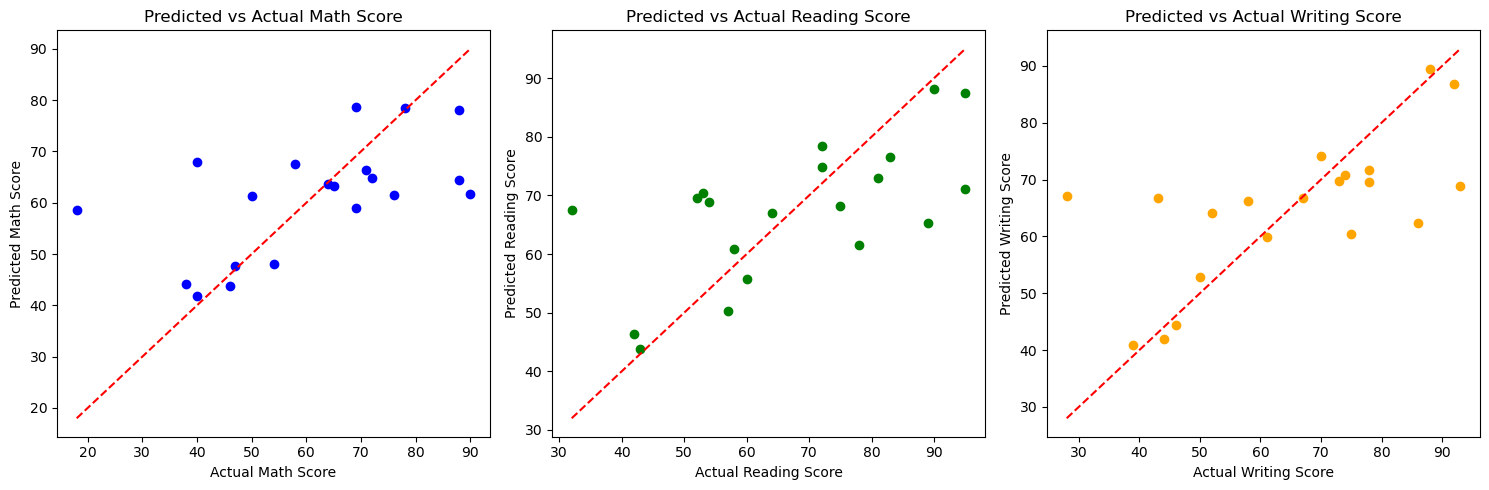

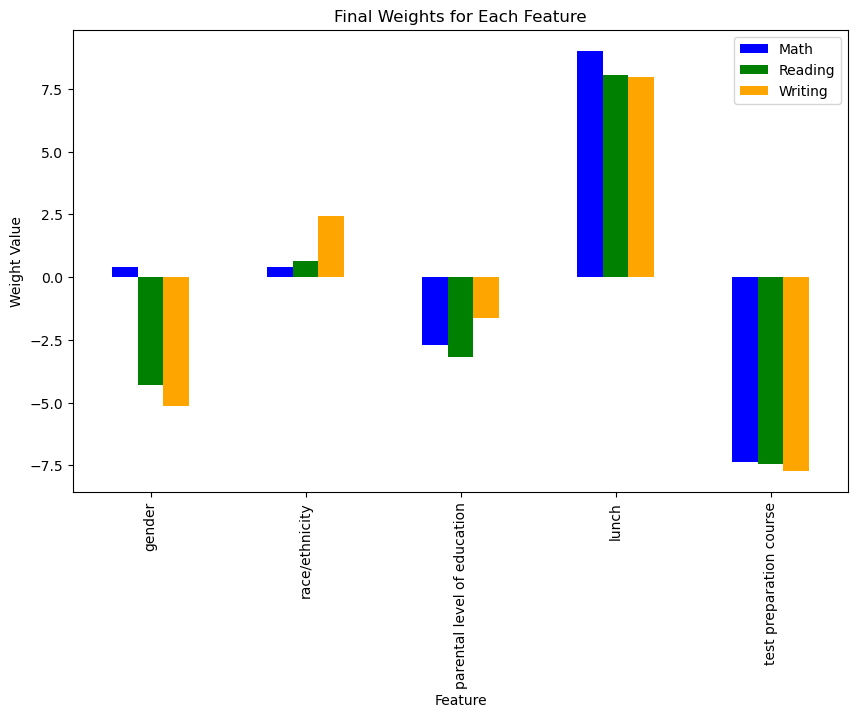

Final weights values:
                                  Math   Reading   Writing
gender                       0.418767 -4.296567 -5.152547
race/ethnicity               0.395749  0.661751  2.456592
parental level of education -2.716475 -3.183090 -1.628253
lunch                        9.018943  8.058795  7.964038
test preparation course     -7.375462 -7.448152 -7.718344


In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Dataset
data = {
    'gender': ['female', 'female', 'female', 'male', 'male', 'female', 'female', 'male', 'male', 'female', 'male', 'male', 'female', 'male', 'female', 'female', 'male', 'female', 'male', 'female'],
    'race/ethnicity': ['group B', 'group C', 'group B', 'group A', 'group C', 'group B', 'group B', 'group B', 'group D', 'group B', 'group C', 'group D', 'group B', 'group A', 'group A', 'group C', 'group C', 'group B', 'group C', 'group D'],
    'parental level of education': ["bachelor's degree", 'some college', 'master\'s degree', 'associate\'s degree', 'some college', 'associate\'s degree', 'some college', 'some college', 'high school', 'high school', 'associate\'s degree', 'associate\'s degree', 'high school', 'some college', 'master\'s degree', 'some high school', 'high school', 'some high school', 'master\'s degree', 'associate\'s degree'],
    'lunch': ['standard', 'standard', 'standard', 'free/reduced', 'standard', 'standard', 'standard', 'free/reduced', 'free/reduced', 'free/reduced', 'standard', 'standard', 'standard', 'standard', 'standard', 'standard', 'standard', 'standard', 'free/reduced', 'free/reduced'],
    'test preparation course': ['none', 'completed', 'none', 'none', 'none', 'none', 'completed', 'none', 'completed', 'none', 'none', 'none', 'none', 'completed', 'none', 'none', 'none', 'none', 'none', 'none'],
    'math score': [72, 69, 90, 47, 76, 71, 88, 40, 64, 38, 58, 40, 65, 78, 50, 69, 88, 18, 46, 54],
    'reading score': [72, 90, 95, 57, 78, 83, 95, 43, 64, 60, 54, 52, 81, 72, 53, 75, 89, 32, 42, 58],
    'writing score': [74, 88, 93, 44, 75, 78, 92, 39, 67, 50, 52, 43, 73, 70, 58, 78, 86, 28, 46, 61]
}

# Convert the dataset into a pandas dataframe
df = pd.DataFrame(data)

# Encode categorical features using LabelEncoder
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['race/ethnicity'] = label_encoder.fit_transform(df['race/ethnicity'])
df['parental level of education'] = label_encoder.fit_transform(df['parental level of education'])
df['lunch'] = label_encoder.fit_transform(df['lunch'])
df['test preparation course'] = label_encoder.fit_transform(df['test preparation course'])

# Features (X) and target (y)
X = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']]
y = df[['math score', 'reading score', 'writing score']]

# Normalize the feature data
X = (X - X.mean()) / X.std()

# Linear Regression with Gradient Descent (Equation-based)
def gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):
    m = len(y)  # Number of data points
    X = np.c_[np.ones((m, 1)), X]  # Add a column of ones for the bias term (w_0)
    y = y.to_numpy()  # Convert to numpy array
    
    # Initialize weights (for each target variable)
    w = np.zeros((X.shape[1], y.shape[1]))
    
    # Gradient Descent
    for _ in range(num_iterations):
        # Compute predictions
        predictions = X.dot(w)
        
        # Compute the gradient
        gradients = (2 / m) * X.T.dot(predictions - y)
        
        # Update weights
        w -= learning_rate * gradients
    
    return w

# Train the model using gradient descent
weights = gradient_descent(X, y)

# Predictions using the learned weights
X_test = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
predictions = X_test.dot(weights)

# Plotting Predicted vs Actual scores
plt.figure(figsize=(15, 5))

# Math Score
plt.subplot(1, 3, 1)
plt.scatter(y['math score'], predictions[:, 0], color='blue', label='Math Score')
plt.plot([y['math score'].min(), y['math score'].max()], [y['math score'].min(), y['math score'].max()], color='red', linestyle='--')
plt.title("Predicted vs Actual Math Score")
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")

# Reading Score
plt.subplot(1, 3, 2)
plt.scatter(y['reading score'], predictions[:, 1], color='green', label='Reading Score')
plt.plot([y['reading score'].min(), y['reading score'].max()], [y['reading score'].min(), y['reading score'].max()], color='red', linestyle='--')
plt.title("Predicted vs Actual Reading Score")
plt.xlabel("Actual Reading Score")
plt.ylabel("Predicted Reading Score")

# Writing Score
plt.subplot(1, 3, 3)
plt.scatter(y['writing score'], predictions[:, 2], color='orange', label='Writing Score')
plt.plot([y['writing score'].min(), y['writing score'].max()], [y['writing score'].min(), y['writing score'].max()], color='red', linestyle='--')
plt.title("Predicted vs Actual Writing Score")
plt.xlabel("Actual Writing Score")
plt.ylabel("Predicted Writing Score")

plt.tight_layout()
plt.show()

# Final values for weights (parameters)
weights_df = pd.DataFrame(weights[1:], columns=['Math', 'Reading', 'Writing'], index=X.columns)
weights_df.plot(kind='bar', figsize=(10, 6), color=['blue', 'green', 'orange'])
plt.title("Final Weights for Each Feature")
plt.ylabel("Weight Value")
plt.xlabel("Feature")
plt.show()

# Print final weights
print("Final weights values:\n", weights_df)
